In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('filtered_topic_segments_q.csv')

In [ ]:
df_q

,Unnamed: 0,abstract
0,0,A workplace timer app that initiates work and ...
1,1,a nursing cushion with built-in privacy panels...
2,2,To create a space between nano-electrode secti...
3,3,It is revealed a more effective method for amp...
4,4,The method described by the invention involves...
5,5,a method and tools for making polypropylene po...
6,6,the fluorinated block copolyester includes blo...
7,7,As the dmdheu /(dmdheu + tmm) ratio rises from...
8,8,"Without the use of a yankee dryer, soft throug..."
9,9,a high transmittance sun control textile and a...


In [ ]:
with open('queries_new.txt','r') as file:
  queries = file.readlines()

In [ ]:
len(queries)

91

In [ ]:
df_s = pd.read_csv('summarized_queries.csv')
df_s

,Unnamed: 0,abstract
0,0,The app keeps track of the degree of user's co...
1,1,A nursing cushion with built-in privacy panels...
2,2,The source and drain that are created from the...
3,3,The invention allows for the production of S. ...
4,4,The invention involves coating work items in a...
5,5,Yarn is made by winding undrawn yarn on a bobb...
6,6,The fluorinated block copolyester includes blo...
7,7,The tensile strength of dmdheu fabric has been...
8,8,Wet end rush transfer and the throughdrying fa...
9,9,A high-performance sun control film is convert...


In [ ]:
queries_formatted = []
for i in queries:
  queries_formatted.append(i.strip())
df_queries = pd.DataFrame({'abstract':queries_formatted})
df_queries.to_csv('queries.csv')

In [1]:
import requests
import json
import pandas as pd
import numpy as np

In [3]:
import pickle5 as pickle

In [2]:
def run_query_on_pqai(query):
  response = requests.get('https://api.projectpq.ai//search/102/',params={'token':'696afedbebde383ad9d1b3c93454a343','q':query})
  dict_resp = json.loads(response.content)

  ids = []
  abstracts = []
  titles = []
  score = []
  for i in dict_resp['results']:
    ids.append(i['id'])
    abstracts.append(i['abstract'])
    titles.append(i['title'])
    score.append(i['score'])

  df_response = pd.DataFrame({'id':ids,'title':titles,'abstract':abstracts,'score':score})
  return dict_resp

### 2. Relevancy Check for Specificity model 

In [4]:
with open('only_general.pickle','rb') as handle:
  only_gen = pickle.load(handle)
with open('gen_and_sp.pickle','rb') as handle:
  gen_and_sp = pickle.load(handle)

In [7]:
scores = []
for q in only_gen:
  df = run_query_on_pqai(q)
  score = df['results'][0]['score']
  scores.append(score)

In [12]:
scores_1 = []
for q in gen_and_sp:
  df = run_query_on_pqai(q)
  score = df['results'][0]['score']
  scores_1.append(score)

In [15]:
df_sp_details =  pd.DataFrame({'only_gen':scores,'gen_and_specific':scores_1})
df_sp_details['difference'] = df_sp_details['only_gen'] - df_sp_details['gen_and_specific']
df_sp_details

,only_gen,gen_and_specific,difference
0,0.261862,0.289585,-0.027723
1,0.327856,0.112104,0.215752
2,0.245931,0.164699,0.081232
3,0.275583,0.175132,0.100451
4,0.232468,0.249625,-0.017157
5,0.167909,0.090582,0.077327
6,0.131064,0.244317,-0.113254
7,0.428912,0.186328,0.242585
8,0.181769,0.149528,0.032241
9,0.159748,0.179279,-0.019531


In [16]:
import matplotlib.pyplot as plt

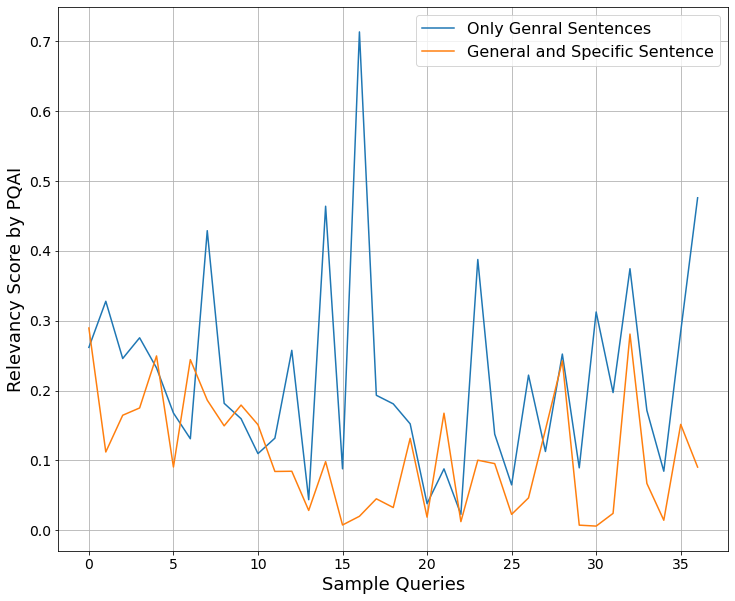

In [35]:
plt.figure(figsize=(12,10))
plt.plot(scores)
plt.plot(scores_1)
plt.grid(True)
plt.xlabel('Sample Queries', fontsize=18)
plt.ylabel('Relevancy Score by PQAI', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['Only Genral Sentences', 'General and Specific Sentence'],prop={'size': 16})
#plt.show()
plt.savefig('foo.png', bbox_inches='tight')

In [ ]:
df_s['scores']=scores

### 2. Relevancy Check for Verbosity model 

In [ ]:
pred_len = [ 85.51998311,  88.21041006,  87.47157969,  84.33632661,
         88.47789092,  83.99089666,  56.13110858,0,  75.87837803,
         93.93121781, 104.77569139,  87.46053541]
df_s['pred_len']=pred_len
actual_len = [51, 47, 36, 41, 57, 37, 36,0, 47, 62, 47, 56]
df_s['actual_len']=actual_len

In [ ]:
df_q['scores']=scores

In [ ]:
pred_len = [ 79.0719177 ,  82.40247446,  62.96737792,  85.55208404,106.10278622,  74.8091718 ,  36.67473117,0,  65.18563686,90.44778302,  94.31452666,  62.41099891]
df_q['pred_len']=pred_len

In [ ]:
actual_len = [58, 76, 56, 73, 128, 59, 60,0, 82, 93, 89, 87]
df_q['actual_len']=actual_len

In [ ]:
df_q

,Unnamed: 0,abstract,scores,pred_len,actual_len
0,0,A workplace timer app that initiates work and ...,0.149662,79.071918,58
1,1,a nursing cushion with built-in privacy panels...,0.109823,82.402474,76
2,2,To create a space between nano-electrode secti...,0.059989,62.967378,56
3,3,It is revealed a more effective method for amp...,0.007599,85.552084,73
4,4,The method described by the invention involves...,0.045094,106.102786,128
5,5,a method and tools for making polypropylene po...,0.018818,74.809172,59
6,6,the fluorinated block copolyester includes blo...,0.100362,36.674731,60
7,7,As the dmdheu /(dmdheu + tmm) ratio rises from...,0.280909,0.000000,0
8,8,"Without the use of a yankee dryer, soft throug...",0.067080,65.185637,82
9,9,a high transmittance sun control textile and a...,0.014395,90.447783,93


In [ ]:
df_s.to_csv('summerized_queries_prediction.csv')

In [ ]:
!pip3 install pickle5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 256 kB 5.0 MB/s 


In [ ]:
import pickle5 as pickle

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/thesis_PQAI/verbosity_model/coref_links/snippets_q.pickle','rb') as handle:
  a = pickle.load(handle)

In [ ]:
df_s['verbosity_degree'] = df_s['pred_len'] - df_s['actual_len']
df_s

,Unnamed: 0,abstract,scores,pred_len,actual_len,verbosity_degree
0,0,The app keeps track of the degree of user's co...,0.198020,85.519983,51,34.519983
1,1,A nursing cushion with built-in privacy panels...,0.162471,88.210410,47,41.210410
2,2,The source and drain that are created from the...,0.241547,87.471580,36,51.471580
3,3,The invention allows for the production of S. ...,0.065064,84.336327,41,43.336327
4,4,The invention involves coating work items in a...,0.078486,88.477891,57,31.477891
5,5,Yarn is made by winding undrawn yarn on a bobb...,0.072862,83.990897,37,46.990897
6,6,The fluorinated block copolyester includes blo...,0.164377,56.131109,36,20.131109
7,7,The tensile strength of dmdheu fabric has been...,0.650595,0.000000,0,0.000000
8,8,Wet end rush transfer and the throughdrying fa...,0.222777,75.878378,47,28.878378
9,9,A high-performance sun control film is convert...,0.039831,93.931218,62,31.931218


In [ ]:
df_q['verbosity_degree'] = df_q['pred_len'] - df_q['actual_len']
df_q

,Unnamed: 0,abstract,scores,pred_len,actual_len,verbosity_degree
0,0,A workplace timer app that initiates work and ...,0.149662,79.071918,58,21.071918
1,1,a nursing cushion with built-in privacy panels...,0.109823,82.402474,76,6.402474
2,2,To create a space between nano-electrode secti...,0.059989,62.967378,56,6.967378
3,3,It is revealed a more effective method for amp...,0.007599,85.552084,73,12.552084
4,4,The method described by the invention involves...,0.045094,106.102786,128,-21.897214
5,5,a method and tools for making polypropylene po...,0.018818,74.809172,59,15.809172
6,6,the fluorinated block copolyester includes blo...,0.100362,36.674731,60,-23.325269
7,7,As the dmdheu /(dmdheu + tmm) ratio rises from...,0.280909,0.000000,0,0.000000
8,8,"Without the use of a yankee dryer, soft throug...",0.067080,65.185637,82,-16.814363
9,9,a high transmittance sun control textile and a...,0.014395,90.447783,93,-2.552217


In [ ]:
df_s.to_csv('summerized_queries_prediction_1.csv')
df_q.to_csv('summerized_queries_prediction_2.csv')

In [ ]:
df_q.abstract[11]

'a process that enhances the consistency between the produced fancy yarn and its desired configuration. After being manufactured, the fancy yarn is fed via a sensor device in a spinning mechanism, which continuously measures the diameter of the fancy yarn. Based on the measured diameter values, the fancy configuration of the created yarn is determined and compared to the specified fancy configuration. The comparison is done repeatedly until there is a good match between the predetermined fancy configuration and the fancy configuration of the optimized, generated yarn.'